**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje Supervisado**

*Edición 2022*

**Grupo 3**

# DiploDatos Kaggle Competition


Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier

## Ejemplo del profesor de prácticos

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')
print(df.shape) 
print(df.describe()) 
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


### Algún análisis exploratorio que permita tomar decisiones sobre las variabes a usar, transformaciones de variables, tratamiento de los datos faltantes, etc. etc.

In [ ]:
# elijo y transformo algunas variables (en su análisis fundamente sus decisiones)
for var in X:
    if X[var].dtype == 'object':
        unique_cases = X[var].unique()
        if len(unique_cases) > 5:
            print(var)
            X.drop(var, inplace=True, axis=1)

passengerId = X.PassengerId
X.drop('PassengerId',axis=1,inplace=True)

print(X.columns)
label_cols = ["HomePlanet", "CryoSleep", "Destination" ,"VIP"]

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X

Cabin
Name
Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.320042,-0.746493,0.579856,1.967465,-0.209979,-0.329239,2.124377,-0.262923,-0.092514,3.312022
1,1.478619,1.108595,1.769839,-0.757408,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
2,0.320042,1.108595,0.579856,0.290620,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
3,-0.838536,-0.746493,0.579856,0.989305,-0.209979,-0.118291,0.473999,-0.284910,-0.266208,-0.078616
4,-0.838536,-0.746493,0.579856,-0.687539,-0.209979,-0.329239,-0.278040,0.848286,-0.265317,-0.235676
...,...,...,...,...,...,...,...,...,...,...
7818,1.478619,-0.746493,0.579856,-1.176619,5.752517,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7819,-0.838536,-0.746493,0.579856,1.059174,-0.209979,-0.329239,-0.278040,0.973445,-0.210982,-0.264316
7820,1.478619,1.108595,0.579856,1.827728,-0.209979,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088
7821,-0.838536,-0.746493,0.579856,-0.967013,-0.209979,-0.329239,0.244901,-0.076876,-0.266208,-0.248610


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8) 

### Planteo modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [ ]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 93.90%
Accuracy test Árbol de decisión: 72.52%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Árbol de decisión: 81.88%
Accuracy test Árbol de decisión: 76.23%


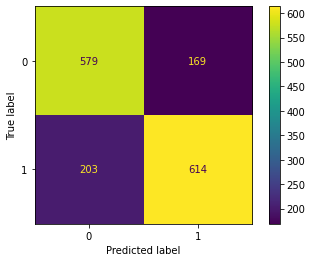

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       748
           1       0.78      0.75      0.77       817

    accuracy                           0.76      1565
   macro avg       0.76      0.76      0.76      1565
weighted avg       0.76      0.76      0.76      1565



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 78.59
Precisión test fold 1: 77.80
Precisión test fold 2: 78.27
Precisión test fold 3: 77.46
Precisión test fold 4: 76.58
Avg. accuracy = 77.74026146494944


## Generar la salida para entregar

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento

In [ ]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
test_df[imputer_cols] = imputer.fit_transform(test_df[imputer_cols])

PassengerId = test_df['PassengerId']
test_df.drop(['PassengerId','Cabin', 'Name'], inplace=True, axis=1)

for col in label_cols:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

cols = test_df.columns
test_df = StandardScaler().fit_transform(test_df)
test_df = pd.DataFrame(test_df, columns=cols)

Generamos la salida

In [ ]:
test_id = PassengerId
test_pred = clf.predict(test_df)


In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

# Respuestas Grupo 3


## 1- Analisis del conjunto de datos

El conjunto de datos se basa en los registros personales recuparados de la caja negra de la nave Espacial Titanic, luego de que esta sufriera una "colision-anomalia" de espacio tiempo. Este conjunto de datos de la competencia Kaggle permitira realizar la prediccion de que pasajeros han sido transportados y cuales No.

## 2- Definicion de la variable objetivo que hay que predecir y cual es su significado




La varialble que muestra si el pasajero fue transportado a una dimension alternativa es "Transported", por lo cual sera nuestra variable objetivo con salida binaria

*   1 pasajero transportado a otra dimensión
*   0 pasajero NO transportado a otra dimensión

## 3- Atributos disponibles para hacer la predicción


Realizamos analisis exploratorio del conjunto de entrenamiento.

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv')

Los atributos disponibles para realizar la predicción son:

-   **PassengerId** - Id único para cada pasajero.
-   **HomePlanet** - El planeta de origen del pasajero.
-   **CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.
-   **Cabin** - El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde sidepuede ser Ppor Babor o Spor Estribor .
-   **Destination** - El planeta al que el pasajero se dirije.
-   **Age** - La edad del pasajero.
-   **VIP** - Si el pasajero ha pagado por servicio VIP durante el viaje.
-  **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Monto facturado a cada pasajero en cada uno de los muchos servicios de lujo del Spaceship Titanic.
-   **Name** - Primer nombre y apellido del pasajero.
-  **Transported**- Si el pasajero fue transportado a otra dimensión. Verdadero o Falso. Columna que se tratara predecir.


In [ ]:
dataset.shape #son 14 variables y 7823 

(7823, 14)

In [ ]:
dataset['PassengerId'] = dataset['PassengerId'].astype(str) #Esta variable las toma como numéricas
#pero en realidad se deberían tomar como variables categóricas
print(dataset.describe(include = 'all')) #Descripcción de todas las variables que incluye el dataset

       PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         7823       7644      7627     7639         7663  7661.000000   
unique        7823          3         2     6009            3          NaN   
top           3430      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4114      4871        8         5316          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.879389   
std            NaN        NaN       NaN      NaN          NaN    14.461548   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall        

Las únicas variables que cuentan con la totalidad de los registros son *Passenger Id* y *Transported*, por lo que seguidamente se va a utilizar algún método de imputación de valores faltantes en todas las variables excepto "Name" dado que ya esta la variable "Passenger Id" para identificar a cada pasajero y además esta última ya cuenta con todos los registros.

Primero vamos a analizar las distintas variables, que vamos a utilizar para hacer las predicciones, antes de imputar los datos faltantes. 

### Cantidad de pasajeros transportados a otra dimensión

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

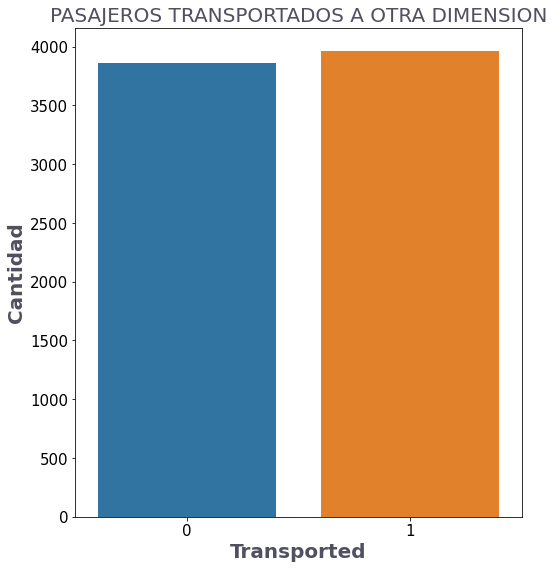

In [ ]:
 # Contamos la cantidad de pasajeros que fueron transportados vs los que no fueron transportados

import seaborn as sns
fig = plt.figure(figsize=(8,9))
sns.countplot(data=dataset, x='Transported')

plt.title('PASAJEROS TRANSPORTADOS A OTRA DIMENSION', 
            loc='center', color='#505060', fontsize=20)

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505060')
plt.xlabel("Transported", size=20, fontweight='bold', color='#505060')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

### Cantidad de pasajeros transportados a otra dimensión vs lugar de origen 

In [ ]:
# Primero vamos a modificar la variable "HomePlanet" donde si vienen de Europa, es lo mismo a que vengan de la Tierra. 
dataset['HomePlanet'] = np.where(dataset.HomePlanet == 'Europa', 'Earth', dataset.HomePlanet)
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Earth,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Earth,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

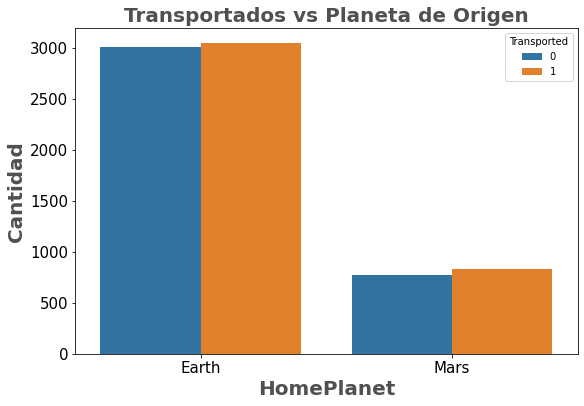

In [ ]:
 #Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='HomePlanet',hue='Transported')

plt.title('Transportados vs Planeta de Origen',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("HomePlanet", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En este grafico se puede ver que según el lugar de origen de los pasajeros las posibilidades de se transportados cambian. La mayoría de las personas que fueron transportadas a otra dimensión, provienen del planeta Tierra.

### Cantidad de pasajeros transportados a otra dimensión vs CryoSleep

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

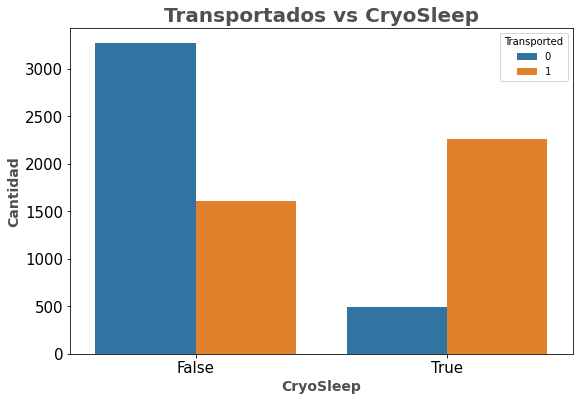

In [ ]:
#Graficamente podemos verlo de la siguiente manera
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.color_palette("flare", as_cmap=True)

sns.countplot(data=dataset, x='CryoSleep', hue='Transported')

plt.title('Transportados vs CryoSleep',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=14, fontweight='bold', color='#505050')
plt.xlabel("CryoSleep", size=14, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

En el grafico anterior podemos ver que los pasajeros en criosueño (que estában confinados en sus cabinas) tienen una mayor posibilidad de haber sido transportados a otra dimensión.

### Cantidad de pasajeros transportados a otra dimensión vs destino

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

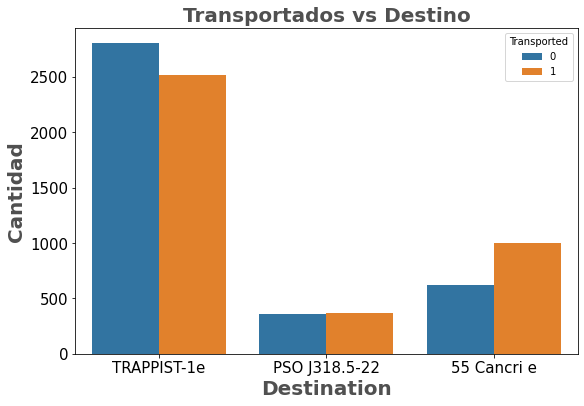

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='Destination',hue='Transported')

plt.title('Transportados vs Destino',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Destination", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

No existe ningun tendencia clara de transporte segun el lugar del destino, si bien más personas con destino a TRAPPIST-1e fueron transportadas a otra dimensión es porque hay muchas más personas con este destino que a los otros destinos. En cualquiera de los casos tanto las personas que fueron transportadas a otra dimensión como las que no estan bastante parejos y por eso no se puede concluir que el lugar de destino influya. 

### Cantidad de pasajeros transportados a otra dimensión vs edad

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 10 Text major ticklabel objects>)

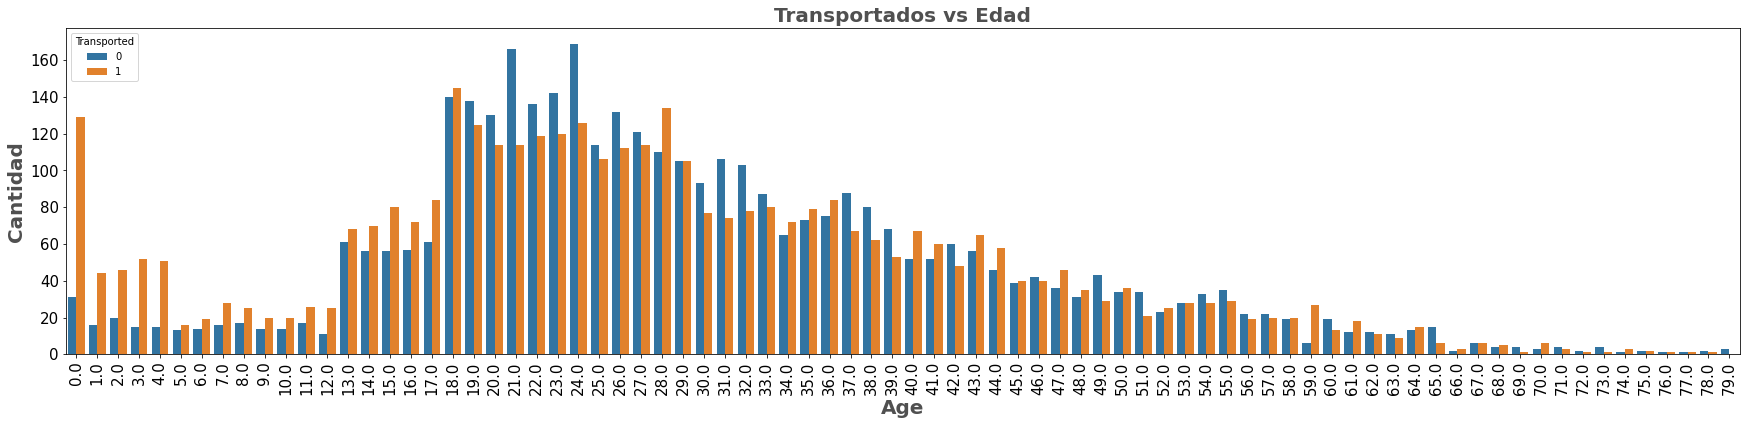

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(30,6))
sns.countplot(data=dataset, x='Age',hue='Transported')

plt.title('Transportados vs Edad',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("Age", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

En las personas de menor edad vemos que es mayor la proporción de transportados que los no transportado de esa misma edad. 

### Cantidad de pasajeros transportados a otra dimensión vs pago VIP

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

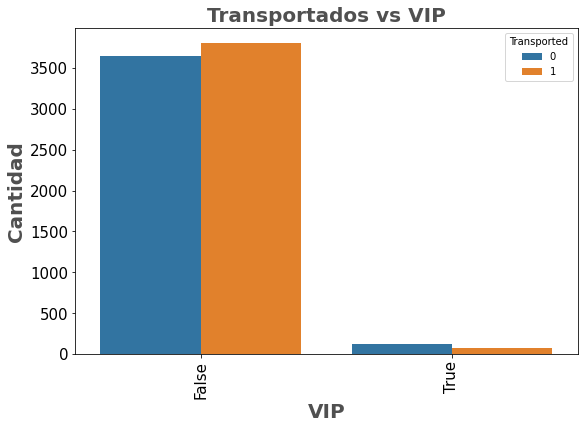

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(9,6))
sns.countplot(data=dataset, x='VIP',hue='Transported')

plt.title('Transportados vs VIP',
            loc='center', color='#505050', fontsize=20, fontweight='bold')

plt.ylabel("Cantidad", size=20, fontweight='bold', color='#505050')
plt.xlabel("VIP", size=20, fontweight='bold', color='#505050')

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

En este caso tampoco vemos que la variable VIP influya en ser transportado o no, sino que hay más personas que no pagaron el VIP de las que si pagaron y es por ello que vemos un mayor porcentaje de transportados que no pagaron el VIP. 

In [ ]:
# Vamos a sacar la columna Name y quedarnos solo con PassengerId
df1 = dataset.drop(columns = ['Name'])
num_cols = [i for i in df1.columns if i not in ['Transported','PassengerId','HomePlanet','CryoSleep','Cabin','Destination', 'VIP']] #variables numéricas a imputar
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,3430,Earth,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1
2,8430,Earth,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0


Para poder utilizar los datos de todas las variables del dataframe para imputar los datos faltantes, dependiendo del método que se utilice y siendo que además tenemos un dataframe con variables categóricas y numéricas, resulta necesario codificar las variables categóricas. 

Además ante cualquier implementación de un algoritmo de imputación o de machine learning siempre es conveniente estandarizar o normalizar los datos con el objetivo de obtener mejores resultados y de manera más eficiente. Este dataframe tiene muchas variables cuyos rangos de datos varían mucho entre sí y es por ello que resulta conveniente estandarizar los datos para acotar ese rango de variación en todas las variables. 

In [ ]:
label_cols = ["PassengerId", "Cabin", "HomePlanet", "CryoSleep", "Destination" ,"VIP"] #Variables categóricas que primero vamos a codificar para luego poder imputarlas 
# Aplicamos label encoder excluyendo los valores Nan
for col_name in label_cols:
    series = df1[col_name]
    label_encoder = LabelEncoder()
    df1[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )

Text(0.5, 1.0, 'Correlation between Variables')

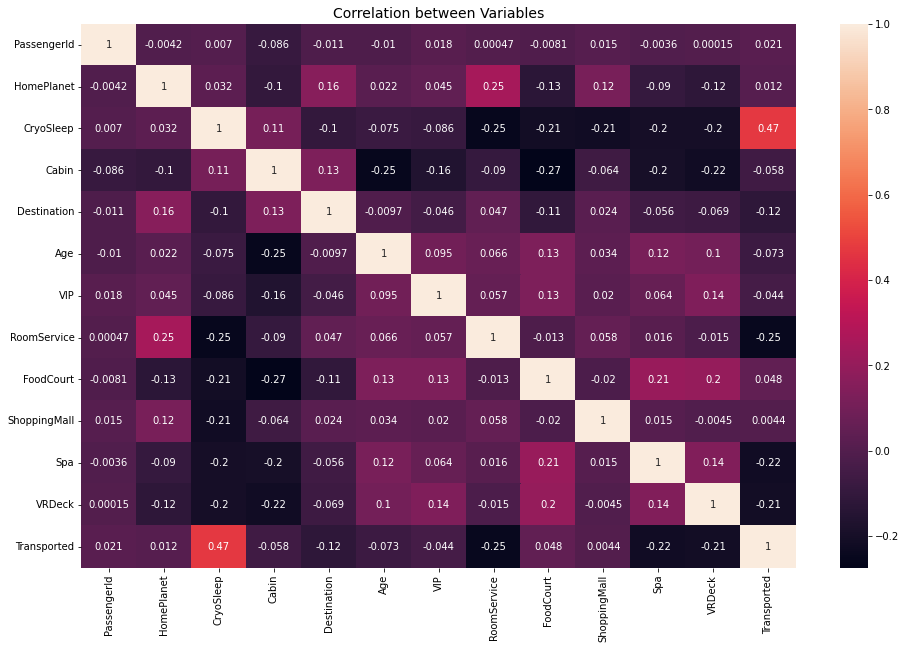

In [ ]:
# Luego de codificar las variables categóricas se calcula la matriz de correlación entre variables y un heatmap para ver cuáles son las variables que 
# se encuentran más correlacionadas con Transported.
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables', fontsize=14)

Las variables más correlacionadas con Transported son "CryoSleep", "RoomService", "Spa" y "VRDeck", estas variables más otras van a ser consideradas para predecir los valores. 

In [ ]:
y_1 = df1.Transported #Variable que queremos predecir
X_1 = df1.drop(columns = ['Transported', 'PassengerId', 'Destination']) #Variables que vamos a utilizar para predecir. La variable PassengerId no es más que 
# una variable para identificar a los pasajeros y no nos aporta información para predecir si fue transportado o no. 

In [ ]:
#Con IterativeImputer se puede utilizar todo el conjunto de características numéricas y categóricas codificadas para estimar los valores faltantes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

standar = StandardScaler().fit_transform(X_1) 

imputer = IterativeImputer(random_state = 0) #Por default utiliza BayesianRidge que es una regresión lineal regularizada
X_1[X_1.columns] = imputer.fit_transform(standar)
X_1

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,-0.513498,-0.752195,-1.271734,1.944636,-0.156665,-0.332891,2.099303,-0.266942,-0.097078,3.272797
1,1.947428,1.329442,-0.280221,-0.752347,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
2,-0.513498,1.329442,-1.342160,0.284954,0.014349,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
3,-0.513498,-0.752195,-0.171532,0.976488,-0.156665,-0.123802,0.464079,-0.288685,-0.269134,-0.083662
4,-0.513498,-0.752195,1.647351,-0.683193,-0.156665,-0.332891,-0.281056,0.831932,-0.268252,-0.239138
...,...,...,...,...,...,...,...,...,...,...
7818,1.947428,-0.752195,-0.242513,-1.167267,0.036731,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
7819,-0.513498,-0.752195,1.312965,1.045642,-0.156665,-0.332891,-0.281056,0.955702,-0.214429,-0.267489
7820,1.947428,1.329442,0.078010,1.806329,-0.156665,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
7821,-0.513498,-0.752195,-0.756569,-0.959807,-0.156665,-0.332891,0.237084,-0.082960,-0.269134,-0.251942


In [ ]:
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, train_size=0.8, random_state = 8) #Dividimos el train dataset para tener el conjunto
# de entrenamiento y de testeo

### Primer modelo: Random Forest

In [ ]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=10, max_features = None, random_state=2)
clf.fit(x_1_train, y_1_train)

RandomForestClassifier(max_features=None, n_estimators=10, random_state=2)

Vamos a utilizar GridSearchCV para buscar los mejores parámetros

In [ ]:
param_grid = {"criterion":["log_loss","gini"], "min_samples_leaf" : [5, 10, 20], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 200]}

In [ ]:
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy')
gs = gs.fit(x_1_train, y_1_train)

In [ ]:
gs.best_score_ 

0.8012144916654537

In [ ]:
gs.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'n_estimators': 50}

Se utiliza el modelo con los mejores parámetros para realizar una stratified k-fold cross-validation. El objetivo de esto es tomar muestras estratificadas del mismo conjunto de datos, todas las muestras son distintas entre sí, para poder probar el desempeño del modelo. Es por ello que se obtiene la accuracy del modelo en cada muestra y luego un promedio de todas ellas. 

In [ ]:
folds = 7
cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=10)

x_2_train = np.array(x_1_train)
y_2_train = np.array(y_1_train)


for clfi,_ in zip([ensemble.RandomForestClassifier(**gs.best_params_)],_):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_2_train, y_2_train)):
        xi, yi = x_2_train[train_idx], y_2_train[train_idx]
        x_valid, y_valid = x_2_train[val_idx], y_2_train[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= folds
    print(f'Avg. accuracy = {avg_accuracy * 100}')

RandomForestClassifier(min_samples_leaf=20, n_estimators=50)
Precisión test fold 0: 78.41
Precisión test fold 1: 81.10
Precisión test fold 2: 80.65
Precisión test fold 3: 80.43
Precisión test fold 4: 79.31
Precisión test fold 5: 80.54
Precisión test fold 6: 79.08
Avg. accuracy = 79.92968999680409


In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X_1.columns[:10]).sort_values(ascending=False) # Variables de mayor importancia
feature_imp[:10]

Cabin           0.238900
CryoSleep       0.236769
Age             0.128900
VRDeck          0.086673
Spa             0.083839
FoodCourt       0.075062
RoomService     0.071845
ShoppingMall    0.057160
HomePlanet      0.013156
VIP             0.007696
dtype: float64

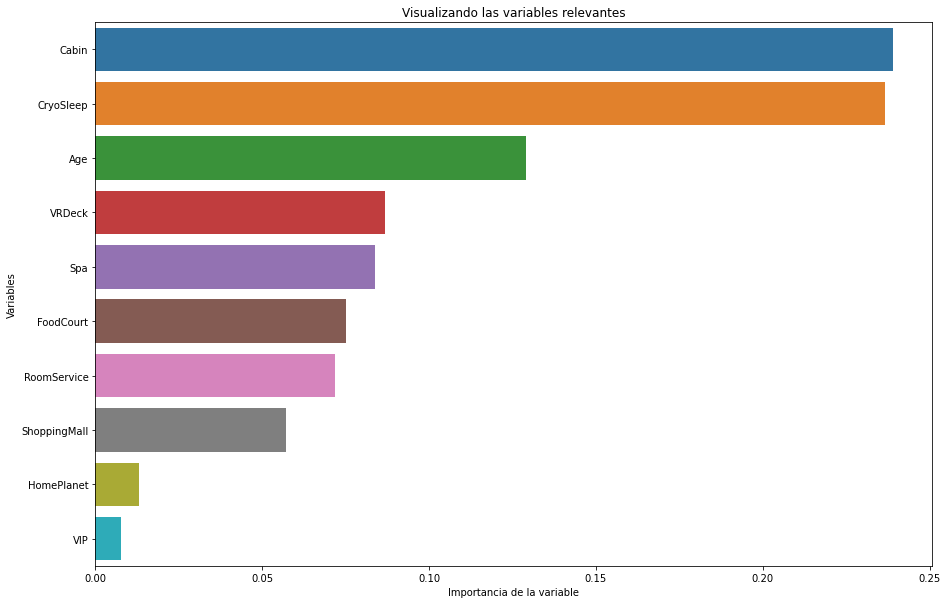

In [ ]:
# Graficamos las variables más importantes y que tan importante son expresaco en proporciones. 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importancia de la variable')
plt.ylabel('Variables')
plt.title("Visualizando las variables relevantes")

plt.show()

En el gráfico vemos que los resultados están bastante acorde con lo que se obtuvo anteriormente cuando se analizaron las distintas variables, encontrando siempre entre las primeras a "CryoSleep", "VRDeck", "Spa", "RoomService" y se suma "Cabin" como la que tiene mayor importancia de todas ellas. 

Las variables HomePlanet y VIP parecen ser las menos relevantes dado que su importancia es menor al 5%, sin embargo se van a dejar en el dataset porque siguen aportando información para predecir si el pasajero fue transportado o no. 

### Modelo dos: Red Neuronal 

In [ ]:
from sklearn import neural_network
net = neural_network.MLPClassifier(
    activation = 'relu',
    solver='adam',
    alpha=1e-6, 
    hidden_layer_sizes=5,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    batch_size=50,
    random_state=1,
    max_iter=1000,
    verbose=True,
    early_stopping=True)

In [ ]:
net.fit(x_1_train.values, y_1_train)

Iteration 1, loss = 0.72593337
Validation score: 0.551118
Iteration 2, loss = 0.63500499
Validation score: 0.661342
Iteration 3, loss = 0.56619729
Validation score: 0.744409
Iteration 4, loss = 0.51659211
Validation score: 0.765176
Iteration 5, loss = 0.48412911
Validation score: 0.765176
Iteration 6, loss = 0.46720709
Validation score: 0.761981
Iteration 7, loss = 0.45884301
Validation score: 0.763578
Iteration 8, loss = 0.45374908
Validation score: 0.769968
Iteration 9, loss = 0.45046503
Validation score: 0.774760
Iteration 10, loss = 0.44811554
Validation score: 0.776358
Iteration 11, loss = 0.44652879
Validation score: 0.776358
Iteration 12, loss = 0.44527993
Validation score: 0.777955
Iteration 13, loss = 0.44446278
Validation score: 0.777955
Iteration 14, loss = 0.44374799
Validation score: 0.777955
Iteration 15, loss = 0.44281177
Validation score: 0.777955
Iteration 16, loss = 0.44229841
Validation score: 0.777955
Iteration 17, loss = 0.44180583
Validation score: 0.781150
Iterat

MLPClassifier(alpha=1e-06, batch_size=50, early_stopping=True,
              hidden_layer_sizes=5, learning_rate='adaptive', max_iter=1000,
              random_state=1, verbose=True)

In [ ]:
# Se realiza una cross validation, muy parecido a lo que se realizó para el modelo de Random Forest con la diferencia
# de que estas muestras no se encuentran estratificadas, sino que se forman de manera aleatoria. 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(net, x_1_train.values, y_1_train, cv = 3)

Iteration 1, loss = 0.73818263
Validation score: 0.526316
Iteration 2, loss = 0.67049320
Validation score: 0.593301
Iteration 3, loss = 0.61671437
Validation score: 0.650718
Iteration 4, loss = 0.57143414
Validation score: 0.681818
Iteration 5, loss = 0.53479328
Validation score: 0.739234
Iteration 6, loss = 0.50638040
Validation score: 0.744019
Iteration 7, loss = 0.48619912
Validation score: 0.744019
Iteration 8, loss = 0.47278410
Validation score: 0.751196
Iteration 9, loss = 0.46441419
Validation score: 0.753589
Iteration 10, loss = 0.45907769
Validation score: 0.763158
Iteration 11, loss = 0.45519784
Validation score: 0.765550
Iteration 12, loss = 0.45144426
Validation score: 0.763158
Iteration 13, loss = 0.44869668
Validation score: 0.763158
Iteration 14, loss = 0.44654192
Validation score: 0.760766
Iteration 15, loss = 0.44508531
Validation score: 0.763158
Iteration 16, loss = 0.44368159
Validation score: 0.763158
Iteration 17, loss = 0.44276771
Validation score: 0.763158
Iterat

In [ ]:
scores # puntaje de cada muestra de la validación cruzada

array([0.79817833, 0.79098754, 0.78763183])

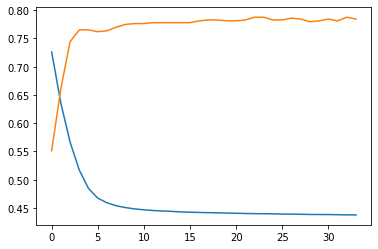

In [ ]:
# Train loss and validation accuracy
plt.plot(net.loss_curve_)
plt.plot(net.validation_scores_)

### Tercer modelo: Super Linear Vector Machine 

In [ ]:
svc = sklearn.svm.LinearSVC(loss="hinge", random_state=26, max_iter = 100000).fit(x_1_train, y_1_train)

### Cuarto Modelo: Super Vector Machine

In [ ]:
svc_1 = sklearn.svm.SVC(kernel="poly", degree = 4, random_state=26) #En este caso se utiliza una función polinómica de grado 4. 
svc_1.fit(x_1_train, y_1_train)

SVC(degree=4, kernel='poly', random_state=26)

Para realizar la elección del mejor modelo primero se van a calcular distintas métricas de todos los modelos sobre el conjunto de entrenamiento y luego de testeo, junto con una matriz de confusión sobre los datos de testeo para ver más en detalle cuál etiqueta predice mejor cada modelo. 

Random Forest
Accuracy train Random Forest: 83.43%
Accuracy test Random Forest: 80.00%


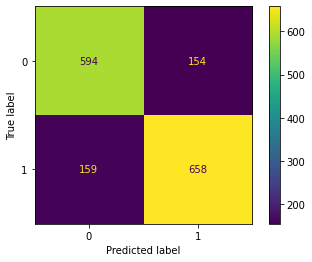

Red Neuronal
Accuracy train Red Neuronal: 80.11%
Accuracy test Red Neuronal: 80.19%


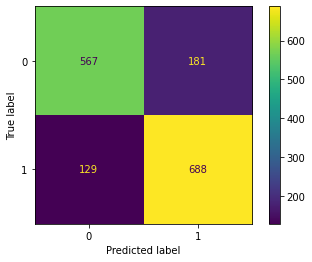

LinearSVM
Accuracy train LinearSVM: 78.49%
Accuracy test LinearSVM: 77.44%


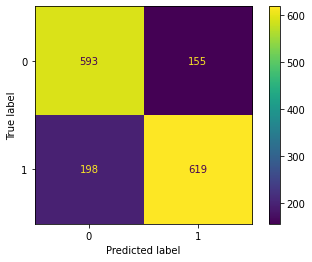

SVM
Accuracy train SVM: 77.09%
Accuracy test SVM: 76.10%


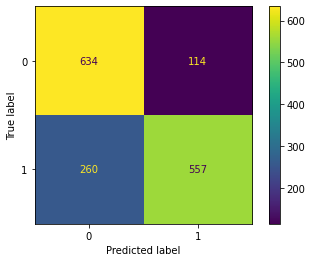

In [ ]:
clfs =  [gs,net,svc,svc_1]

names = ['Random Forest',
        'Red Neuronal',
         'LinearSVM',
        'SVM']

for clfi, name in zip(clfs, names):
    print(name)
    train_predictions = clfi.predict(x_1_train)
    accuracy = accuracy_score(y_1_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clfi.predict(x_1_test)
    accuracy = accuracy_score(y_1_test, test_predictions)
    cm = confusion_matrix(y_1_test, test_predictions, labels=clfi.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clfi.classes_)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    disp.plot()
    plt.show()

Según los resultados anteriores los mejores modelos son Random Forest y la Red Neuronal. Se van a realizar otras métricas utilizando el classification report de sklearn y gráficos sobre estos dos modelos para saber cuál tiene mejor desempeño. 

In [ ]:
pred = gs.predict(x_1_test)
print(classification_report(y_1_test, pred, labels = [0,1], digits = 3))

              precision    recall  f1-score   support

           0      0.789     0.794     0.791       748
           1      0.810     0.805     0.808       817

    accuracy                          0.800      1565
   macro avg      0.800     0.800     0.800      1565
weighted avg      0.800     0.800     0.800      1565



In [ ]:
pred = net.predict(x_1_test)
print(classification_report(y_1_test, pred, labels = [0,1], digits = 3))

              precision    recall  f1-score   support

           0      0.815     0.758     0.785       748
           1      0.792     0.842     0.816       817

    accuracy                          0.802      1565
   macro avg      0.803     0.800     0.801      1565
weighted avg      0.803     0.802     0.801      1565



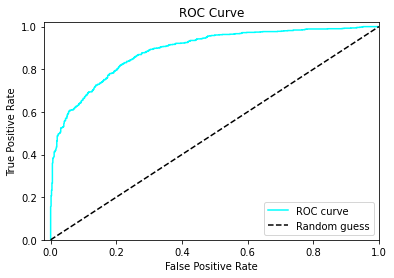

In [ ]:
fpr, tpr, thresholds = roc_curve(y_1_test,gs.predict_proba(x_1_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve', c='cyan')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

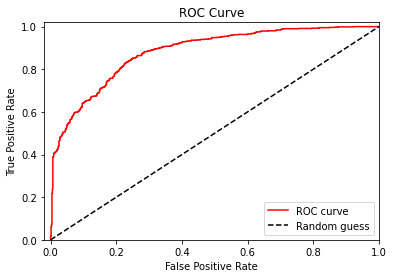

In [ ]:
fpr, tpr, thresholds = roc_curve(y_1_test,net.predict_proba(x_1_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve', c='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

En base al classification report y la curva ROC o ACU-ROC, ambos modelos tienen
un desempeño similar y ajustan bien los datos, la diferencia entre ellos es bastante sensible si nos guiamos por estas dos métricas. Lo único que nos inclina a elegir el modelo de Redes Neuronales es que según la función de pérdida del conjunto de entrenamiento y la función de accuracy no se presenta un overfitting. Luego al medir la accuracy de los modelos en el conjunto de entrenamiento y de testeo, en Random Forest vemos que es mayor en el conjunto de entrenamiento que en el de testeo, por lo tanto el ajuste en los datos de entrenamiento es mejor y lo que se busca es que sea mejor en los de testeo. En el caso de la Red Neuronal son iguales, lo cual es preferible a lo que sucede con el modelo anterior. 

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv')

In [ ]:
X_test = test_df.drop(columns = ['Name'])

In [ ]:
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0


In [ ]:
label_cols = ["PassengerId", "Cabin", "HomePlanet", "CryoSleep", "Destination" ,"VIP"]
# Aplicamos label encoder excluyendo los valores Nan
for col_name in label_cols:
    series = X_test[col_name]
    label_encoder = LabelEncoder()
    X_test[col_name] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )

In [ ]:
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,40,1.0,1.0,NaN,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
1,868,0.0,1.0,676.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,448,0.0,0.0,778.0,2.0,44.0,0.0,22.0,1.0,0.0,864.0,0.0
3,826,0.0,0.0,262.0,1.0,63.0,0.0,0.0,0.0,80.0,0.0,2322.0
4,300,1.0,0.0,25.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865,592,2.0,0.0,323.0,2.0,54.0,0.0,676.0,0.0,231.0,379.0,0.0
866,536,0.0,1.0,809.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
867,669,0.0,1.0,600.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
868,155,0.0,0.0,453.0,2.0,18.0,0.0,765.0,0.0,13.0,0.0,0.0


In [ ]:
#Con IterativeImputer se puede utilizar todo el conjunto de característica numéricas disponibles para estimar los valores faltantes
x_names = X_test.columns
standar = StandardScaler().fit_transform(X_test) 

imputer = IterativeImputer(random_state = 0) #Por default utiliza BayesianRidge que es una regresión lineal regularizada
X_test[X_test.columns] = imputer.fit_transform(standar)
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,-1.570792,0.484111,1.421743,-0.187783,-1.842557,0.382620,-0.138426,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534
1,1.726079,-0.782945,1.421743,1.122608,-0.614186,-1.043489,-0.138426,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534
2,0.053753,-0.782945,-0.703362,1.550381,0.614186,1.061720,-0.138426,-0.351821,-0.315467,-0.277604,0.427094,-0.253534
3,1.558847,-0.782945,-0.703362,-0.613646,-0.614186,2.352009,-0.138426,-0.392550,-0.316125,-0.156820,-0.314802,1.259065
4,-0.535543,0.484111,-0.703362,-1.607589,-1.842557,-1.247218,-0.138426,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534
...,...,...,...,...,...,...,...,...,...,...,...,...
865,0.627122,1.751166,-0.703362,-0.357821,0.614186,1.740819,-0.138426,0.858950,-0.316125,0.071159,0.010636,-0.253534
866,0.404145,-0.782945,1.421743,1.680390,0.614186,2.012459,-0.138426,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534
867,0.933715,-0.782945,1.421743,0.803875,-0.614186,-0.703939,-0.138426,-0.392550,-0.316125,-0.277604,-0.314802,-0.253534
868,-1.112893,-0.782945,-0.703362,0.187379,0.614186,-0.703939,-0.138426,1.023718,-0.316125,-0.257976,-0.314802,-0.253534


In [ ]:
X_test = X_test.drop(columns={'PassengerId', 'Destination'})

Antes de generar la salida necesitamos elegir el mejor modelo y para ello se calculan las métricas sobre el conjunto de testeo, que es lo que nos va a decir el verdadero rendimiento del modelo y ver si extrapola bien en datos desconocidos.  

In [ ]:
test_id = PassengerId
test_pred = net.predict(X_test)

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

In [ ]:
submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0
